# Predict Energy Behavior of Prosumers

## Introduction

Questions to Address

* Business Classification:
    * Predict whether the prosumer is a business or not based on the features. 
* Electricity Prices:
    * Predict the price of electricity and what features are having an impact on this price

## Data Exploration

In [1]:
# import necessary libraries
library(dplyr)
library(reshape2)
library(corrplot)
library(rjson)
library(glmnet)
library(MASS)
library(caret)
library(pROC)
library(klaR)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: Matrix

Loaded glmnet 4.1-8


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [2]:
# load the data
# client data
client <- read.csv('data/client.csv')

# county_id_to_name_map data
county_id_to_name <- fromJSON(file="county_id_to_name_map.json")
county_id_to_name <- as.data.frame(county_id_to_name)

# electricity prices data
electricity <- read.csv('data/electricity_prices.csv')

# gas prices data
gas <- read.csv('data/gas_prices.csv')

# drop the date and forecast_date column
client = subset(client, select = -c(date))
electricity = subset(electricity, select = -c(origin_date))
gas = subset(gas, select = -c(origin_date))

electricity = subset(electricity, select = -c(forecast_date))
gas = subset(gas, select = -c(forecast_date))

# merge the three datasets
df <- merge(client, electricity, by = 'data_block_id')
df <- merge(df, gas, by = 'data_block_id')
head(df)

,data_block_id,product_type,county,eic_count,installed_capacity,is_business,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2,1,0,108,952.89,0,96.99,45.62,46.29
2,2,1,0,108,952.89,0,94.77,45.62,46.29
3,2,1,0,108,952.89,0,93.88,45.62,46.29
4,2,1,0,108,952.89,0,92.25,45.62,46.29
5,2,1,0,108,952.89,0,91.83,45.62,46.29
6,2,1,0,108,952.89,0,98.62,45.62,46.29


## Correlation Matrix

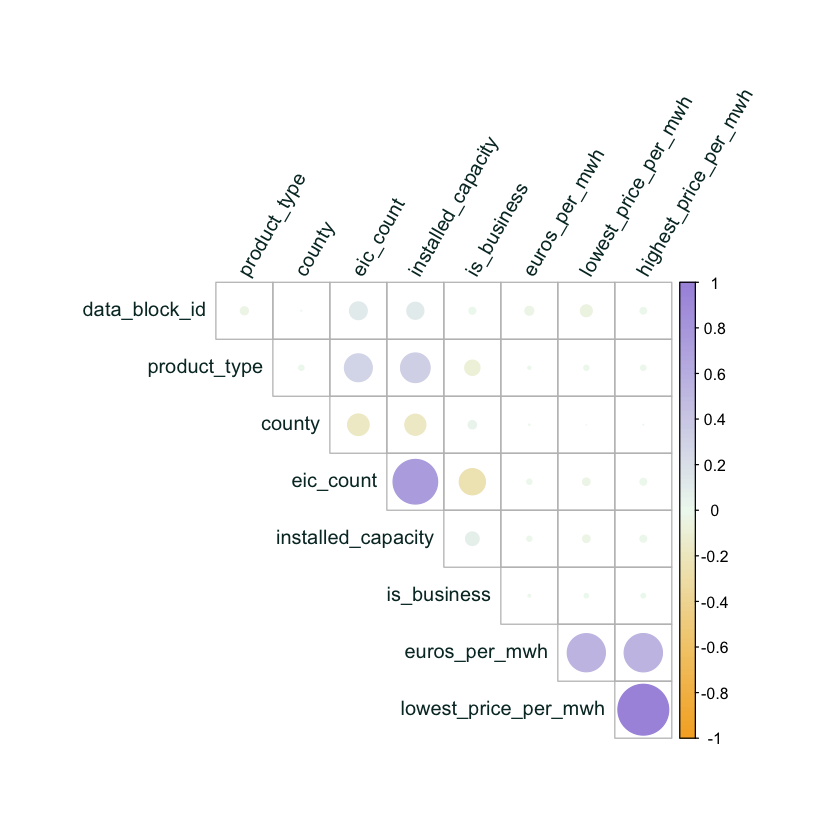

In [3]:
# calculate correlation matrix
correlation_matrix <- cor(df)
# png("correlation_matrix.png")
# plot the cm
corrplot(correlation_matrix, method = "circle", diag=FALSE, type = 'upper', col = colorRampPalette(c("#f6ae2d", "#eff9f0", "#a997df"))(100), tl.col = '#05322F', tl.srt = 60 )     

# dev.off()

In [5]:
tidyset <- read.csv('data/tidyset.csv')
tidyset <- na.omit(tidyset)
ctrl <- trainControl(method = "cv", number = 10)
# drop unnecessary columns
tidyset <- subset(tidyset, select = -c(datetime, UniqueID))

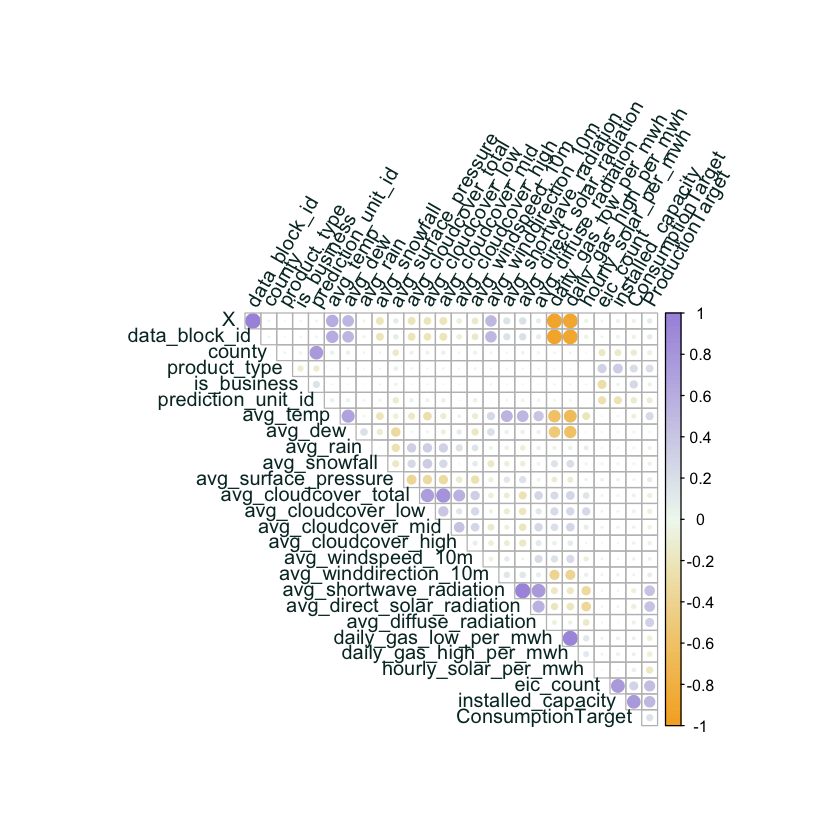

In [6]:
numeric_tidyset <- tidyset[, sapply(tidyset, is.numeric)]
correlation_matrix <- cor(numeric_tidyset)
corrplot(correlation_matrix, method = "circle", diag=FALSE, type = 'upper', col = colorRampPalette(c("#f6ae2d", "#eff9f0", "#a997df"))(100), tl.col = '#05322F', tl.srt = 60 )